This notebook is used to compare multiple training runs.

### Load libraries

In [1]:
import pathlib
from typing import List

import matplotlib.pyplot as plt
import pandas as pd

from go_attack import game_info

### Load run data

In [2]:
def get_run_df(data_dir: str) -> pd.DataFrame:
    sgf_paths = game_info.find_sgf_files(root=pathlib.Path(f"{data_dir}/selfplay"))

    game_infos = game_info.read_and_parse_all_files(
        sgf_paths,
        fast_parse=True,
    )

    df = pd.DataFrame(game_infos)
    print("gtypes:", df.gtype.unique())
    print("Number of cleanup games:", (df.gtype == "cleanuptraining").sum())

    # Filter to only normal games
    df = df.query("gtype == 'normal'")
    print("Fraction continuation:    ", df.is_continuation.mean())
    print("Fraction used_initial_pos:", df.used_initial_position.mean())
    print("max(init_turn_num)       :", df.init_turn_num.max())

    print(f"Done parsing {data_dir}!")

    return df  # type: ignore

In [3]:
# dfv2 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v2/cp127-vis32")
# dfv3 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v3/cp127-vis32")
# dfv4_nvt_19 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss-19-only")
# dfv4 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32")
# dfv4_apt = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt")

dfv4_nvt_v600 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss")
dfv4_nvt_v200 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss-v200")
dfv11 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1.1/cp127-vis32")
# dfv4_nvt_b10 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss-b10")
# dfv4_nvt_v64 = get_run_df("/nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss-v64")

gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0
Done parsing /nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss!
gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0
Done parsing /nas/ucb/tony/go-attack/training/emcts1-v4/cp127-vis32-apt-no-vtimeloss-v200!
gtypes: ['normal']
Number of cleanup games: 0
Fraction continuation:     0.0
Fraction used_initial_pos: 0.0
max(init_turn_num)       : 0
Done parsing /nas/ucb/tony/go-attack/training/emcts1.1/cp127-vis32!


### Plots

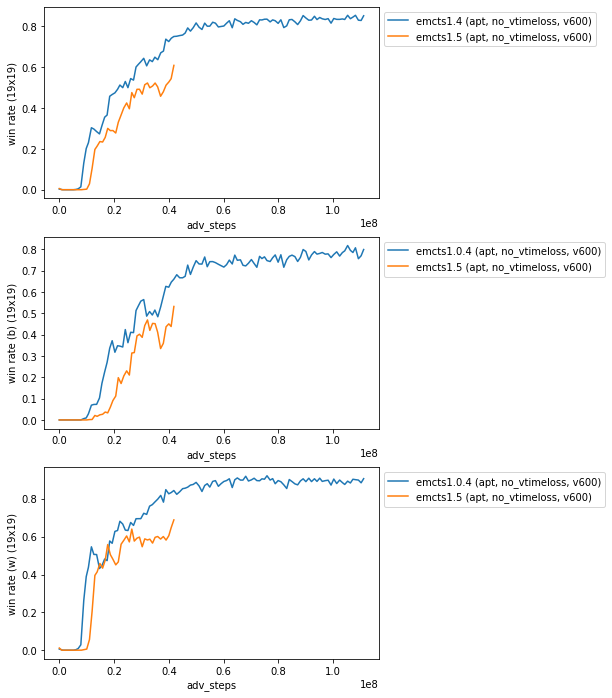

In [7]:
def plot_win_rate(
    df: pd.DataFrame,
    drop_last: int = 2,
    **plot_kwargs,
):
    assert drop_last > 0
    df19 = df[df.board_size == 19]
    df19.groupby("adv_steps").mean().adv_win.iloc[:-drop_last].plot(**plot_kwargs)

plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
plt.ylabel("win rate (19x19)")
plot_win_rate(dfv4_nvt_v600, label="emcts1.4 (apt, no_vtimeloss, v600)")
# plot_win_rate(dfv4_nvt_v200, label="emcts1.0.4 (apt, no_vtimeloss, v200)")
plot_win_rate(dfv11, label="emcts1.5 (apt, no_vtimeloss, v600)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

for i, adv_color in enumerate(("b", "w")):
    plt.subplot(3, 1, 2 + i)
    plt.ylabel(f"win rate ({adv_color}) (19x19)")
    plot_win_rate(dfv4_nvt_v600[dfv4_nvt_v600.adv_color == adv_color], label="emcts1.0.4 (apt, no_vtimeloss, v600)")
    # plot_win_rate(dfv4_nvt_v200[dfv4_nvt_v200.adv_color == adv_color], label="emcts1.0.4 (apt, no_vtimeloss, v200)")
    plot_win_rate(dfv11[dfv11.adv_color == adv_color], label="emcts1.5 (apt, no_vtimeloss, v600)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
